In [2]:
#importo las librerias con las q trabajaré en el notebook
#import the libraries that will hep me in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
#cargo el csv con los datos preprocesados
#load the csv file that contains the pre-processing data

df20 = pd.read_csv('./datos/datos2020.csv', parse_dates=['fecha'])
df20.dropna(subset=['id'], inplace=True)

In [4]:
#revisión de completitud, tipo y memoria del dataframe
#overview of dataframe

df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163393 entries, 0 to 163393
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                163393 non-null  object        
 1   fecha             163393 non-null  datetime64[ns]
 2   codigo_localidad  163393 non-null  float64       
 3   nombre_localidad  163393 non-null  object        
 4   edad              163393 non-null  object        
 5   unidad_edad       163373 non-null  object        
 6   genero            163393 non-null  object        
 7   red               163393 non-null  object        
 8   tipo_incidente    163393 non-null  object        
 9   prioridad         163393 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 13.7+ MB


**Se evidencia...**

A priori todas las columnas parecen tener datos no nulos, a excepcion de la columna de edad. El plan para revisar los datos será el siguiente:

**1.** Revisar que los *codigo_de_localidad* apunten a un solo *nombre_localidad*. Si se presenta duplicidad de nombre, se ajustará para que cumpla con la condición 1:1

**2.** Revisar el atributo de *edad*, hacer tratamiento a nulos y lograr que la columna sea de tipo int para mejorar el posterior analisis

**3.** Revisar la variable *unidad_edad*, evaluando las diferentes categorias y rectificando si vale la pena tener esta columna

**4.** Llevar el atributo de *genero* como una variable categorica de limitadas opciones 

**5.** Para las variables *red*, *tipo_incidente* y *prioridad* se revisará convertirse en variables categoricas sin tener duplicidad de una misma a causa de errores ortograficos o derivados


**Relevant points...***

All the columns apparently seems without null values except "edad" (Age in spanish). The plan will be the next one:

**1.** 

In [5]:
#Se procede a ver el cruce de nombre_localidad y su codigo_localidad en una tabla cruzada
df20['codigo_localidad'] = df20['codigo_localidad'].astype(int)
pd.crosstab(df20['nombre_localidad'], df20['codigo_localidad']).head(50)

codigo_localidad,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
nombre_localidad,,,,,,,,,,,,,,,,,,,,
Antonio Nariño,0,0,0,0,0,0,0,0,0,0,0,0,0,0,558,0,0,0,0,0
Barrios Unidos,0,0,0,0,0,0,0,0,0,0,0,1254,0,0,0,0,0,0,0,0
Bosa,0,0,0,0,0,0,4203,0,0,0,0,0,0,0,0,0,0,0,0,0
Chapinero,0,758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ciudad Bolívar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2058,0
Engativ,0,0,0,0,0,0,0,0,0,1270,0,0,0,0,0,0,0,0,0,0
Engativá,0,0,0,0,0,0,0,0,0,1464,0,0,0,0,0,0,0,0,0,0
Fontib¢n,0,0,0,0,0,0,0,0,599,0,0,0,0,0,0,0,0,0,0,0
Fontibón,0,0,0,0,0,0,0,0,1504,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#Creo un diccionario con un solo nombre para poder reemplazar la columna del nombre de localidad
localidad_dicc = {1 : 'Usaquen', 
                  2 : 'Chapinero',
                  3 : 'Santa Fe',
                  4 : 'San Cristobal',
                  5 : 'Usme',
                  6 : 'Tunjuelito',
                  7 : 'Bosa',
                  8 : 'Kennedy',
                  9 : 'Fontibon',
                  10 : 'Engativa',
                  11 : 'Suba',
                  12 : 'Barrios Unidos',
                  13 : 'Teusaquillo',
                  14 : 'Los Martires',
                  15 : 'Antonio Nariño',
                  16 : 'Puente Aranda',
                  17 : 'La Candelaria',
                  18 : 'Rafael Uribe Uribe',
                  19 : 'Ciudad Bolivar',
                  20 : 'Sumapaz'}

In [7]:
df20['nombre_localidad'] = df20['codigo_localidad'].apply(lambda x: localidad_dicc.get(x))
df20['nombre_localidad'].value_counts()

Kennedy               22073
Suba                  17428
Engativa              16435
Bosa                  12620
Ciudad Bolivar        11871
Puente Aranda          9189
San Cristobal          9052
Rafael Uribe Uribe     8542
Fontibon               8079
Usaquen                8038
Usme                   7385
Tunjuelito             5256
Los Martires           5104
Santa Fe               5033
Teusaquillo            4442
Barrios Unidos         4441
Chapinero              4316
Antonio Nariño         3202
La Candelaria           876
Sumapaz                  11
Name: nombre_localidad, dtype: int64

***Ya se garantiza que no hay varios nombres para un mismo codigo de localidad***

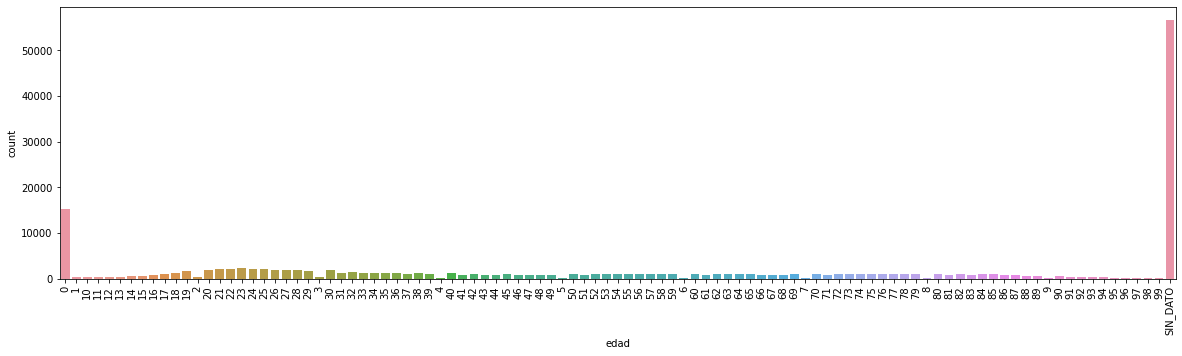

In [8]:
plt.figure(figsize=(20,5))
sns.countplot(x=df20['edad'].sort_values())
plt.xticks(rotation = 90)

plt.show()

*Al revisar la cantidad de registros para cada valor distinto de **Edad** se evidencia que no seria correcto borrar todos los registros "SIN_DATO" porque nos quedariamos sin la mayoría de los registros. *

*Igualmente se observa que el valor 0 tiene particularmente un valor alto, lo que puede llevar a pensar q tambien es una manera de marcar la ausencia de dato de edad*

*Por tal motivo se procede a dejar con valor 0 los datos que contienen 0 y los "SIN_DATO", de esta manera se podrá trabajar con datos numéricos para un mejor analisis*

In [9]:
df20['edad'].replace('SIN_DATO', '0', inplace=True)
df20['edad'] = df20['edad'].astype(int)

/home/ceao/Documents/proyecto_linea123_bogota/linea123_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


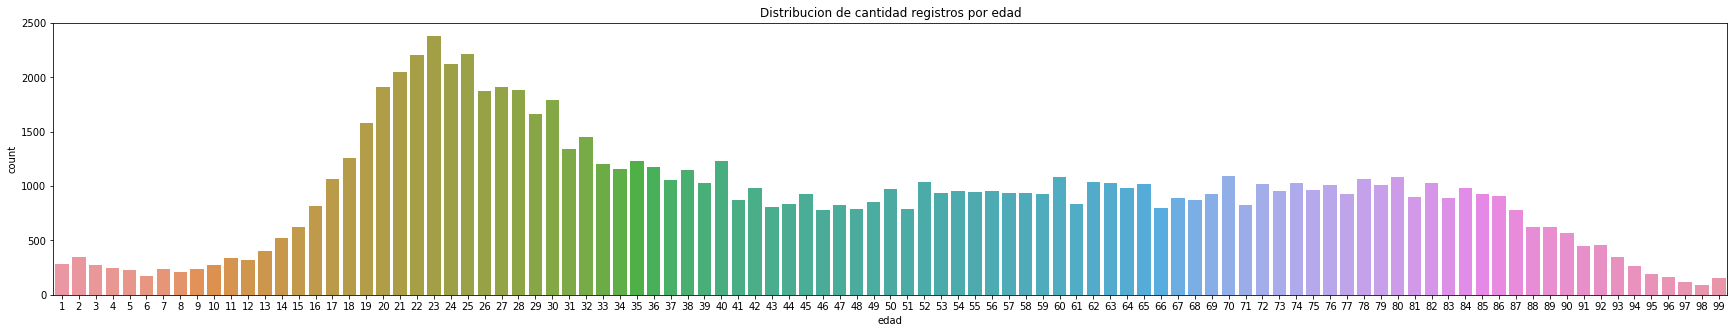

In [10]:
plt.figure(figsize=(30,5))
sns.countplot(df20[df20['edad'] > 0]['edad'])
plt.title('Distribucion de cantidad registros por edad')
plt.show()

*Ya se tendría una variable numerica de edad con la distribucion mostrada arriba*

In [11]:
df20['unidad_edad'].value_counts()

SIN_DATO    71909
Años        46726
A¤os        43810
Meses         737
Dias          118
Horas          73
Name: unidad_edad, dtype: int64

/home/ceao/Documents/proyecto_linea123_bogota/linea123_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


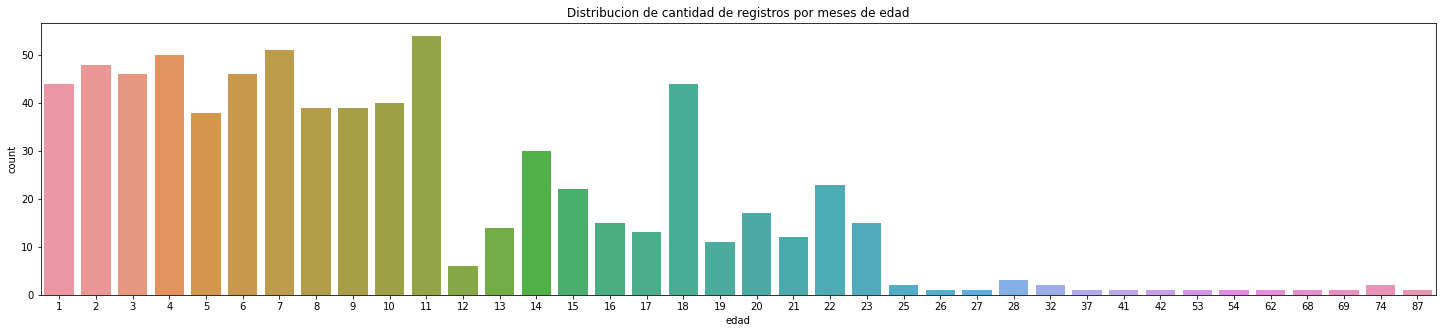

/home/ceao/Documents/proyecto_linea123_bogota/linea123_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


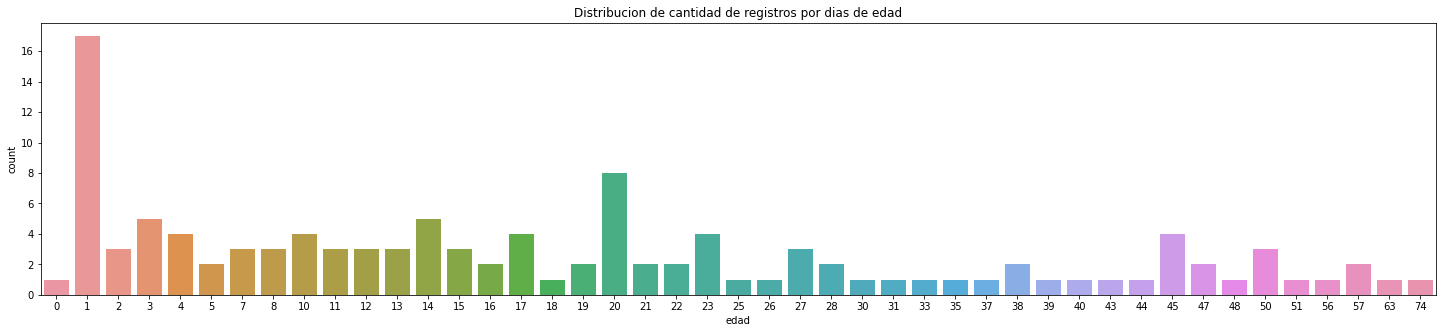

/home/ceao/Documents/proyecto_linea123_bogota/linea123_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


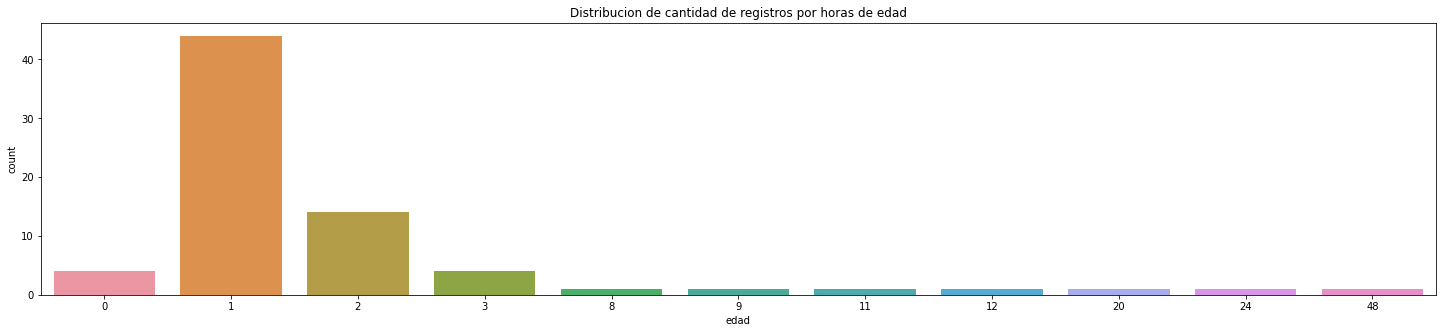

/home/ceao/Documents/proyecto_linea123_bogota/linea123_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


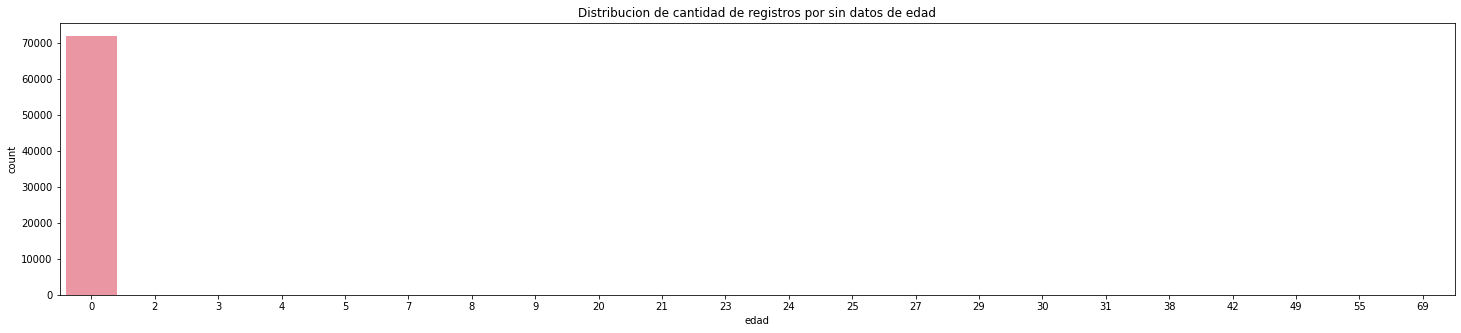

In [12]:
#al ver q existen unidades de meses, dias y horas se procede a revisar la variable edad para estas unidades
plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='Meses']['edad'])
plt.title('Distribucion de cantidad de registros por meses de edad')
plt.show()

plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='Dias']['edad'])
plt.title('Distribucion de cantidad de registros por dias de edad')
plt.show()

plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='Horas']['edad'])
plt.title('Distribucion de cantidad de registros por horas de edad')
plt.show()

plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='SIN_DATO']['edad'])
plt.title('Distribucion de cantidad de registros por sin datos de edad')
plt.show()

In [13]:
#se procede a normalizar en años la variable de edad, se transformaran las otras unidades de tiempo para tener todo en las mismas unidades de tiempo, posteriormente se procedera a borrar la variable de unidad_edad puesto que será el mismo valor para todos

#primero se reemplaca "SIN_DATO" por "Años", esta categoria no implica mas transformacion para la variable "edad", asi mismo con la categoria "A¤os" que evidentemente es un tema de encoding
df20['unidad_edad'].replace('SIN_DATO', 'Años', inplace=True)
df20['unidad_edad'].replace('A¤os', 'Años', inplace=True)

#se transforman los datos de edad que correspondan a datos en meses, dias y horas
df20['edad_nueva'] = df20.apply(lambda transf: transf['edad'] if transf['unidad_edad'] == 'Años' else
                                               max(math.ceil(transf['edad'] / 12), 1) if transf['unidad_edad'] == 'Meses' else
                                               max(math.ceil(transf['edad'] / 360), 1) if transf['unidad_edad'] == 'Dias' else
                                               max(math.ceil(transf['edad'] / 8640), 1), axis=1)

df20['edad_nueva'] = df20['edad_nueva'].astype(int)

Meses    693
Dias     101
Horas     29
Name: unidad_edad, dtype: int64
--------------------------------------------------
/home/ceao/Documents/proyecto_linea123_bogota/linea123_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


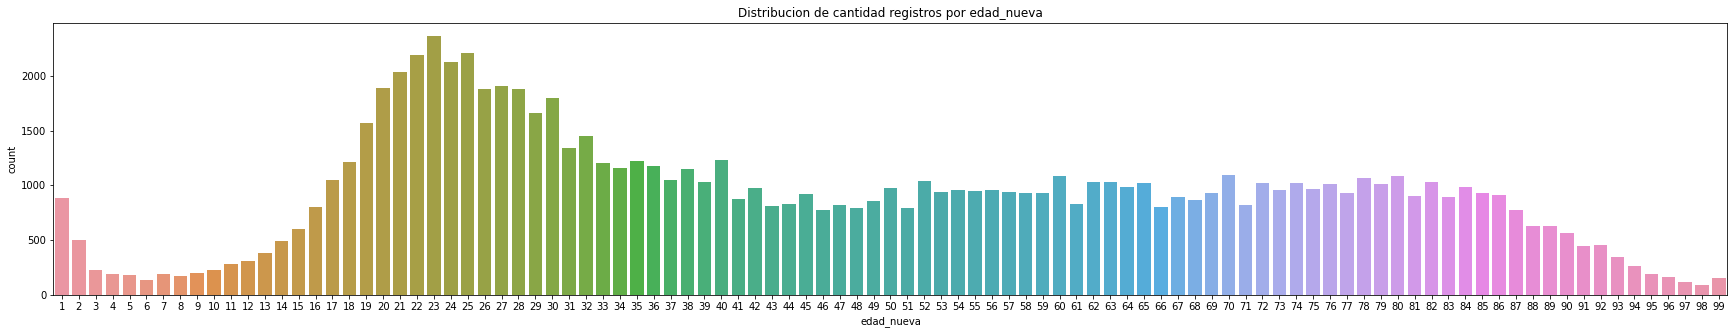

In [14]:
#valido que las unicas edades diferentes entre edad y edad_nueva sean aquellos registros que su unidad_edad sea diferente a "Años"
print(df20[df20['edad_nueva'] != df20['edad']]['unidad_edad'].value_counts())
print('-'* 50)
#vuelvo a graficar la distribucion de cantidad de registros por edad
plt.figure(figsize=(30,5))
sns.countplot(df20[df20['edad_nueva'] > 0]['edad_nueva'])
plt.title('Distribucion de cantidad registros por edad_nueva')
plt.show()

In [15]:
#para simplificar el dataframe de trabajo se procede a remover las columnas "edad" y "unidad_edad", ya que se realizaron las respectivas correcciones con la creacion de la variable "edad_nueva"
df20.drop(columns=['edad','unidad_edad'], inplace=True)

*Ya se tendría una unica variable de edad **"edad_nueva"** que ya esta normalizada en años*

In [16]:
#reviso que categorias existen para el genero
print(df20['genero'].value_counts())

#se procede a normalizar las categorias de FEMENINO y MASCULINO a su equivalente F y M. Se deja la categoria SIN_DATO tal cual. 
df20['genero'].replace('FEMENINO', 'F', inplace=True)
df20['genero'].replace('MASCULINO', 'M', inplace=True)
df20.genero.value_counts()

SIN_DATO     71847
MASCULINO    45173
FEMENINO     38879
M             4167
F             3327
Name: genero, dtype: int64


SIN_DATO    71847
M           49340
F           42206
Name: genero, dtype: int64

*Ya queda con tres categorias la variables de genero*

In [17]:
#Se procede a revisar las categorias unicas para la varible red
print(df20['red'].unique())
#se procede a estandarizar la categoria PRIVADA
df20['red'].replace('PRIVADA', 'Privada', inplace=True)
print(df20['red'].unique())


['Sur' 'Norte' 'Privada' 'PRIVADA']
['Sur' 'Norte' 'Privada']


In [18]:
#se revisan las distintas categorias para "tipo_incidente"
print('la cantidad de registros unicos es: ',df20['tipo_incidente'].unique().size)
print('-'*100)

#al ver que hay categorias que significan lo mismo pero por temas de mayusculas, espacios y ortografia se catalogan como diferentes se procede a normalizar los strings
df20['tipo_incidente'] = df20['tipo_incidente'].str.strip()
print('se remueven espacios a principio y fin de string')
print('la cantidad de registros unicos es: ',df20['tipo_incidente'].unique().size)
print('-'*100)


df20['tipo_incidente'] = df20['tipo_incidente'].str.lower()
print('se pone todo en minusculas')
print(np.sort(df20['tipo_incidente'].unique()))
print('la cantidad de registros unicos es: ',df20['tipo_incidente'].unique().size)
print('-'*100)

la cantidad de registros unicos es:  69
----------------------------------------------------------------------------------------------------
se remueven espacios a principio y fin de string
la cantidad de registros unicos es:  48
----------------------------------------------------------------------------------------------------
se pone todo en minusculas
['accidente cerebro vascular' 'accidente de aviaci¢n' 'acoeve'
 'acompa¤amiento evento' 'acompañamiento evento' 'amenaza de suicidio'
 'apoyo' 'ca¡da de altura' 'caída' 'caída de altura' 'convulsiones'
 'convulsi¢n' 'convulsión' 'dificultad respiratoria' 'dolor tor\xa0cico'
 'dolor torácico' 'electrocuci¢n / rescate' 'electrocución / rescate'
 'enfermo' 'evento respiratorio' 'herido' 'heridos' 'ideas de suicidio'
 'inconsciente / paro cardiorespiratorio'
 'inconsciente/paro cardiorrespiratorio' 'intento de suicidio'
 'intoxicaciones' 'intoxicaci¢n' 'intoxicación' 'maltrato'
 'patolog¡a ginecobst\x82trica' 'patología gineco - obstétric

In [19]:
#se crea un diccionario para disminuir la cantidad de categoria
diccionario_incidentes = {
    'accidente cerebro vascular':['accidente cerebro vascular'],
    'accidente de aviacion':['accidente de aviaci¢n'],
    'acompanamiento evento':['acompa¤amiento evento', 'acoeve', 'acompañamiento evento'],
    'amenaza de suicidio':['amenaza de suicidio', 'intento de suicidio'],
    'apoyo':['apoyo', 'solicitud de apoyo'],
    'caida de altura':['ca¡da de altura', 'caída de altura'],
    'caida':['caída'],
    'convulsion':['convulsiones', 'convulsi¢n', 'convulsión'],
    'dificultad respiratoria':['dificultad respiratoria', 'evento respiratorio'],
    'dolor toraxico':['dolor tor\xa0cico', 'dolor torácico'],
    'electrocucion rescate':['electrocuci¢n / rescate', 'electrocución / rescate'],
    'enfermo':['enfermo'],
    'heridos':['herido','heridos'],
    'paro cardiorrespiratorio':['inconsciente / paro cardiorespiratorio', 'inconsciente/paro cardiorrespiratorio'],
    'intoxicacion':['intoxicaciones', 'intoxicaci¢n', 'intoxicación'],
    'maltrato':['maltrato'],
    'patologia ginecobstetrica':['patolog¡a ginecobst\x82trica', 'patología gineco - obstétrica', 'patología ginecobstétrica'],
    'quemadura':['quemaduras'],
    'sangrado vaginal':['sangrado vaginal'],
    'sin_dato':['sin_dato'],
    'sismo':['sismo'],
    'sintomas gastrointestinal':['s¡ntomas gastrointestinales', 'síntomas gastrointestinales'],
    'trastorno mental':['trastorno mental'],
    'vioencia sexual':['violencia sexual']
}

def minimizar_incidentes(x):
    for i in diccionario_incidentes:
        if x in diccionario_incidentes[i]:
            return i
            break
        else:
            continue
#con esta funcion se crea una nueva columna de categoria de tipo de incidentes
df20['tipo_incidente'] = df20['tipo_incidente'].apply(lambda x: minimizar_incidentes(x))

df20['tipo_incidente'].value_counts()

heridos                       56609
dificultad respiratoria       25574
paro cardiorrespiratorio      18317
enfermo                       11226
convulsion                     9400
trastorno mental               7645
dolor toraxico                 7547
amenaza de suicidio            6937
accidente cerebro vascular     5367
patologia ginecobstetrica      4517
sintomas gastrointestinal      3421
caida de altura                2358
intoxicacion                   1069
caida                           927
apoyo                           669
vioencia sexual                 471
quemadura                       222
acompanamiento evento           215
maltrato                        205
sangrado vaginal                168
electrocucion rescate           124
sin_dato                         91
accidente de aviacion             7
sismo                             1
Name: tipo_incidente, dtype: int64

In [20]:
#se procede a revisar la columna de prioridad

print(df20['prioridad'].unique())

#investigando se encontro que el 1, 2, 3 y 4 corresponden a CRITICA, ALTA, MEDIA y BAJA respectivamente. Se procede a reemplazar de acuerdo a esto

df20['prioridad'].replace('1', 'CRITICA', inplace=True)
df20['prioridad'].replace('2', 'ALTA', inplace=True)
df20['prioridad'].replace('3', 'MEDIA', inplace=True)
df20['prioridad'].replace('4', 'BAJA', inplace=True)
print(df20['prioridad'].unique())

['MEDIA' 'ALTA' 'CRITICA' 'BAJA' '2' '1' '4' '3']
['MEDIA' 'ALTA' 'CRITICA' 'BAJA']


In [21]:
df20.head(10)

,id,fecha,codigo_localidad,nombre_localidad,genero,red,tipo_incidente,prioridad,edad_nueva
0,CRU-00650113-20,2020-01-09 00:28:00,8,Kennedy,F,Sur,dificultad respiratoria,MEDIA,34
1,CRU-00650124-20,2020-01-09 00:29:00,7,Bosa,SIN_DATO,Sur,heridos,ALTA,0
2,CRU-00650125-20,2020-01-09 00:32:00,3,Santa Fe,SIN_DATO,Norte,paro cardiorrespiratorio,CRITICA,0
3,CRU-00650126-20,2020-01-09 00:35:00,3,Santa Fe,SIN_DATO,Norte,amenaza de suicidio,ALTA,0
4,CRU-00650127-20,2020-01-09 02:02:00,19,Ciudad Bolivar,SIN_DATO,Sur,amenaza de suicidio,ALTA,0
5,CRU-00650139-20,2020-01-09 02:02:00,16,Puente Aranda,M,Norte,sintomas gastrointestinal,MEDIA,25
6,CRU-00650153-20,2020-01-09 01:48:00,7,Bosa,F,Sur,paro cardiorrespiratorio,CRITICA,32
7,CRU-00650156-20,2020-01-09 02:03:00,16,Puente Aranda,F,Norte,dolor toraxico,ALTA,37
8,CRU-00650164-20,2020-01-09 03:54:00,1,Usaquen,F,Privada,amenaza de suicidio,MEDIA,25
9,CRU-00650172-20,2020-01-09 03:05:00,4,San Cristobal,M,Sur,enfermo,MEDIA,31


** Habiendo cumplido los pasos de data engineering enunciados al principio, se procede a hacer el analisis exploratorio de los datos**

In [22]:
#se procede a separar la fecha entre fecha y horas para poder hacer analisis por dias y horas
df20['fecha_dia'] = df20['fecha'].dt.date
df20['hora'] = df20['fecha'].dt.hour
df20['dia_semana'] = df20['fecha'].dt.day_of_week
df20.head()
#0 es lunes

,id,fecha,codigo_localidad,nombre_localidad,genero,red,tipo_incidente,prioridad,edad_nueva,fecha_dia,hora,dia_semana
0,CRU-00650113-20,2020-01-09 00:28:00,8,Kennedy,F,Sur,dificultad respiratoria,MEDIA,34,2020-01-09,0,3
1,CRU-00650124-20,2020-01-09 00:29:00,7,Bosa,SIN_DATO,Sur,heridos,ALTA,0,2020-01-09,0,3
2,CRU-00650125-20,2020-01-09 00:32:00,3,Santa Fe,SIN_DATO,Norte,paro cardiorrespiratorio,CRITICA,0,2020-01-09,0,3
3,CRU-00650126-20,2020-01-09 00:35:00,3,Santa Fe,SIN_DATO,Norte,amenaza de suicidio,ALTA,0,2020-01-09,0,3
4,CRU-00650127-20,2020-01-09 02:02:00,19,Ciudad Bolivar,SIN_DATO,Sur,amenaza de suicidio,ALTA,0,2020-01-09,2,3


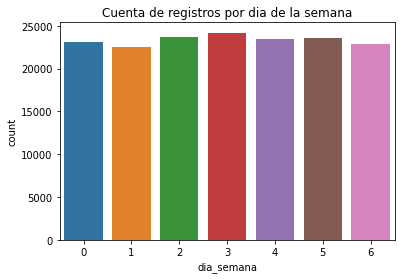

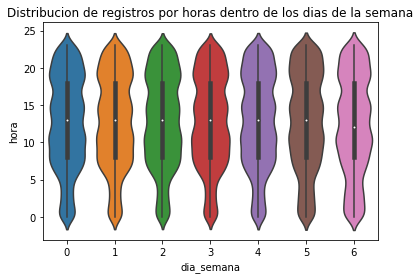

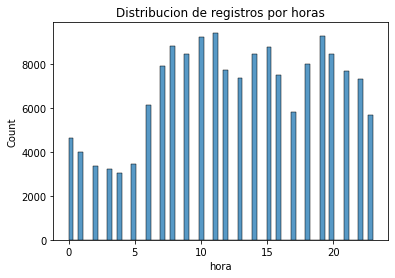

In [31]:
#revision por dia de la semana, hora del dia, y dia-hora
sns.countplot(x=df20['dia_semana'])
plt.title('Cuenta de registros por dia de la semana')
plt.show()

sns.violinplot(data=df20, x='dia_semana', y='hora')
plt.title('Distribucion de registros por horas dentro de los dias de la semana')
plt.show()

sns.histplot(df20['hora'], )
plt.title('Distribucion de registros por horas')
plt.show()

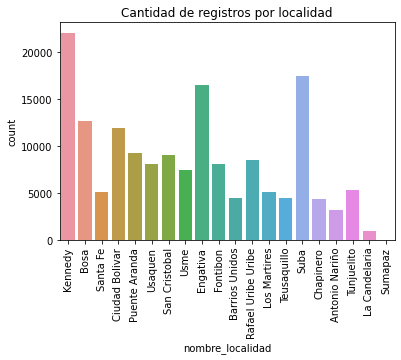

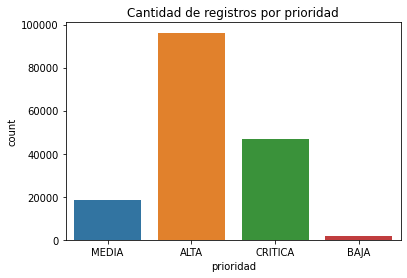

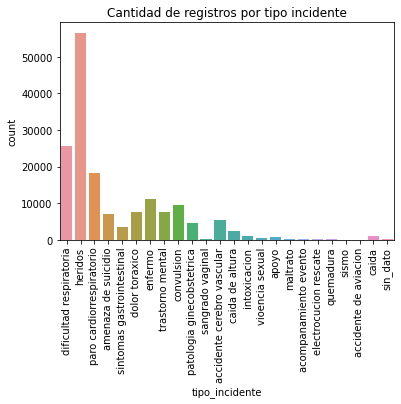

In [36]:
sns.countplot(x=df20['nombre_localidad'])
plt.xticks(rotation=90)
plt.title('Cantidad de registros por localidad')
plt.show()

sns.countplot(x=df20['prioridad'])
plt.title('Cantidad de registros por prioridad')
plt.show()

sns.countplot(x=df20['tipo_incidente'])
plt.xticks(rotation=90)
plt.title('Cantidad de registros por tipo incidente')
plt.show()